# SQL Practice: Answering Business Questions Using SQL
## Introduction
In this project, I will be praciticing my SQL skills to answer business questions. For each question, I will:

* Write a SQL query to extract the relevant data
* Create plots where necessary to visualize the data
* Write a short paragraph drawing conclusions, explaining the data and/or visualizations.

## Database
I'll be using the [Chinook database](https://github.com/lerocha/chinook-database), which is a sample database available for SQL Server, Oracle, MySQL, etc. The Chinook data model represents a digital media store, including tables for artists, albums, media tracks, invoices and customers and has the schema below.
<img src= https://s3.amazonaws.com/dq-content/191/chinook-schema.svg>


Now I'll start by setting up the notebook environment and create some helper functions to save time.

In [1]:
#setting up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
db = 'chinook.db'

#creating a function that takes a SQL query as an argument and returns a pandas dataframe of that query
def run_query(q):
    with sqlite3.connect(db) as conn:
        return pd.read_sql(q, conn)
    
#creating a function that takes a SQL command as an argument and executes it using the sqlite module
def run_command(c):
    with sqlite.connect(db) as conn:
        conn.isolation_level = None #autocommits any changes
        conn.execute(c)
        
#creating a function that calls the run_query() function to return a list of all tables and views in the databse
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)
#now I'll run the function below to see all the tables and views in chinook.db
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


I see that I have a pandas dataframe of the 11 tables from the chinook database.

## Questions
### 1. Selecting Albums to Purchase
The Chinook record store has just signed a deal with a new record label, and I've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - I have the artist names, and the genre of music they produce:

|Artist Name | Genre |
|------------|-------|
|Regal | Hip-Hop|
|Red Tone | Punk |
|Meteor and the Girls | Pop |
|Slim Jim Bites | Blues|

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so I'm interested in finding out which genres sell the best in the USA.

Task: I'll need to write a query to find out which genres sell the most tracks in the USA, and then create a visualization of that data using pandas.




In [39]:
# num_tracks_sold / usa_tracks
q1 = """

WITH usa_tracks AS
    (
     SELECT i.billing_country country,
            il.*
     FROM invoice i
     LEFT JOIN invoice_line il ON il.invoice_id = i.invoice_id
     WHERE i.billing_country = "USA"
     )

SELECT g.name genres,
       COUNT(ut.invoice_line_id) num_tracks_sold,
       CAST(COUNT(ut.invoice_line_id) as Float)/(SELECT COUNT(*) FROM usa_tracks) percent_sold
FROM usa_tracks ut
LEFT JOIN track t ON t.track_id = ut.track_id
LEFT JOIN genre g ON g.genre_id = t.genre_id
GROUP BY 1
ORDER BY 2 DESC    
LIMIT 10

"""
usa_tracks_sold = run_query(q1)
usa_tracks_sold

,genres,num_tracks_sold,percent_sold
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


Now I'll visualize this data:

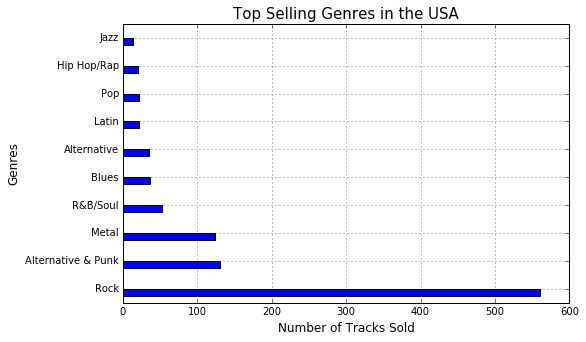

In [68]:
#I set the genre as the dataframe index so it will become the x-axis
#usa_tracks_sold.set_index("genres", drop=True, inplace=True)

ax = usa_tracks_sold.plot.barh(figsize = (8,5),legend = False)
ax.set_title("Top Selling Genres in the USA", size=15)
ax.set_xlabel("Number of Tracks Sold", size=12)
ax.set_ylabel("Genres", size=12)
ax.grid()
plt.show()


Based on the results above, we should purchase albums from Red Tone (Punk), Slim Jim Bites (Blues), and Meteor and the Girls (Pop). However, Rock music dominates the market by making up more than half of purchases. The Chinook record store should consider adding more Rock albums to their inventory.